# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [8]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [12]:
fraud.shape

(1000000, 8)

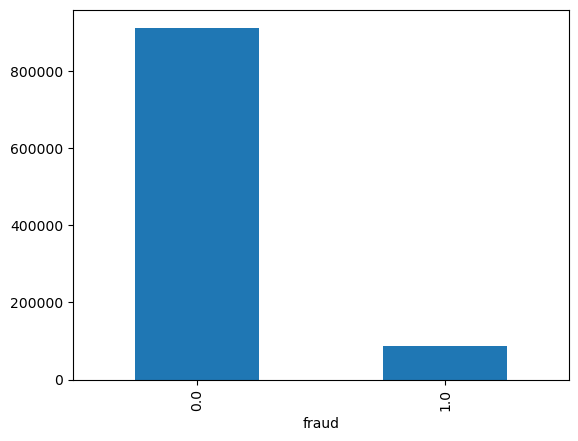

In [14]:
fraud_plot = fraud["fraud"].value_counts()
fraud_plot.plot(kind="bar")
plt.show()

In [16]:
column_summary_fraud = pd.DataFrame({
    'Column Name': fraud.columns,
    'Data Type': fraud.dtypes.values,
    'Percentage Null': fraud.isnull().mean().values * 100,
    'Unique Values': fraud.nunique().values
})

print(column_summary_fraud)

                      Column Name Data Type  Percentage Null  Unique Values
0              distance_from_home   float64              0.0        1000000
1  distance_from_last_transaction   float64              0.0        1000000
2  ratio_to_median_purchase_price   float64              0.0        1000000
3                 repeat_retailer   float64              0.0              2
4                       used_chip   float64              0.0              2
5                 used_pin_number   float64              0.0              2
6                    online_order   float64              0.0              2
7                           fraud   float64              0.0              2


In [18]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [26]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [54]:
X_train_scaled = normalizer.transform(X_train)

X_test_scaled = normalizer.transform(X_test)

In [56]:
X_train_scaled = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_scaled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.000331,0.000083,0.002352,1.0,1.0,0.0,1.0
1,0.003688,0.000002,0.002246,1.0,1.0,0.0,1.0
2,0.005209,0.000082,0.001718,1.0,0.0,0.0,1.0
3,0.000056,0.000045,0.001963,0.0,1.0,0.0,0.0
4,0.002078,0.000002,0.002453,1.0,1.0,0.0,0.0


In [58]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.000344,0.000009,0.016056,1.0,0.0,0.0,1.0
1,0.000074,0.000131,0.002727,0.0,0.0,0.0,1.0
2,0.000136,0.000089,0.002303,0.0,0.0,0.0,1.0
3,0.000124,0.000039,0.001571,0.0,1.0,0.0,0.0
4,0.000915,0.001050,0.015838,1.0,1.0,0.0,1.0


In [36]:
log_reg = LogisticRegression(random_state=42)

In [60]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [62]:
log_reg.score(X_test_scaled, y_test)

0.945495

In [64]:
pred = log_reg.predict(X_test_scaled)

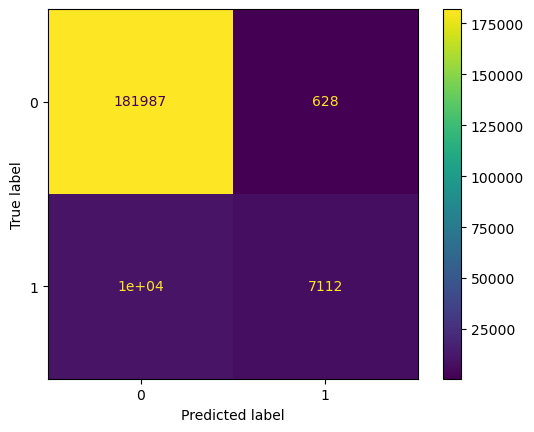

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

#### Oversampling

In [68]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [70]:
train["fraud"] = y_train.values

In [72]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [76]:
yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [78]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
779963,0.000302,0.000903,0.035604,1.0,0.0,0.0,1.0,1.0
496591,0.022409,0.000217,0.010501,1.0,0.0,0.0,1.0,1.0
485804,0.002814,0.000282,0.021233,1.0,1.0,0.0,1.0,1.0
522876,0.000104,0.000643,0.015648,0.0,0.0,0.0,0.0,1.0
241477,0.015858,0.000199,0.001066,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
799995,0.006690,0.000262,0.000437,1.0,0.0,0.0,1.0,0.0
799996,0.000315,0.001097,0.007914,1.0,0.0,0.0,1.0,0.0
799997,0.002521,0.000372,0.001792,1.0,0.0,1.0,0.0,0.0
799998,0.001142,0.000003,0.006678,1.0,0.0,0.0,1.0,0.0


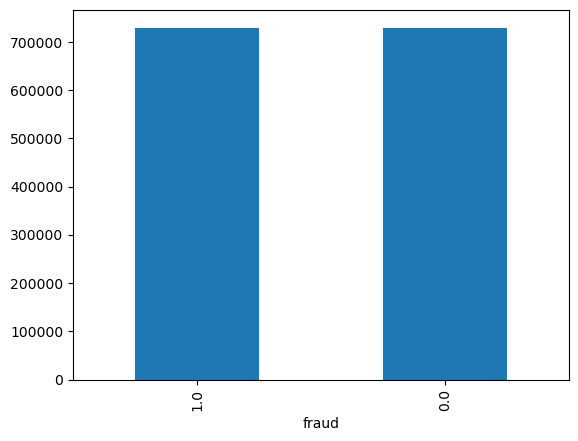

In [96]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [83]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [85]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [87]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    182615
         1.0       0.54      0.93      0.68     17385

    accuracy                           0.92    200000
   macro avg       0.76      0.93      0.82    200000
weighted avg       0.95      0.92      0.93    200000



#### Undersampling

In [90]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.000331,0.000083,0.002352,1.0,1.0,0.0,1.0,0.0
1,0.003688,0.000002,0.002246,1.0,1.0,0.0,1.0,0.0
2,0.005209,0.000082,0.001718,1.0,0.0,0.0,1.0,0.0
3,0.000056,0.000045,0.001963,0.0,1.0,0.0,0.0,0.0
4,0.002078,0.000002,0.002453,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
799995,0.006690,0.000262,0.000437,1.0,0.0,0.0,1.0,0.0
799996,0.000315,0.001097,0.007914,1.0,0.0,0.0,1.0,0.0
799997,0.002521,0.000372,0.001792,1.0,0.0,1.0,0.0,0.0
799998,0.001142,0.000003,0.006678,1.0,0.0,0.0,1.0,0.0


In [92]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,0.004119,0.000020,0.007801,1.0,0.0,0.0,1.0,0.0
199161,0.001052,0.003951,0.000959,1.0,0.0,0.0,1.0,0.0
238970,0.006899,0.000437,0.001052,1.0,0.0,1.0,0.0,0.0
500779,0.002317,0.000003,0.003529,1.0,1.0,0.0,1.0,0.0
251427,0.000776,0.000029,0.002221,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
534039,0.000552,0.000501,0.002651,1.0,0.0,0.0,1.0,0.0
342411,0.002954,0.000018,0.004391,1.0,0.0,0.0,1.0,0.0
400406,0.001626,0.000003,0.001873,1.0,0.0,0.0,0.0,0.0
526304,0.000141,0.000027,0.024870,0.0,1.0,0.0,0.0,0.0


In [94]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,0.004119,0.000020,0.007801,1.0,0.0,0.0,1.0,0.0
199161,0.001052,0.003951,0.000959,1.0,0.0,0.0,1.0,0.0
238970,0.006899,0.000437,0.001052,1.0,0.0,1.0,0.0,0.0
500779,0.002317,0.000003,0.003529,1.0,1.0,0.0,1.0,0.0
251427,0.000776,0.000029,0.002221,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
799941,0.000419,0.001097,0.066801,1.0,1.0,0.0,1.0,1.0
799947,0.011019,0.000104,0.000503,1.0,0.0,0.0,1.0,1.0
799959,0.000671,0.000013,0.014943,1.0,0.0,0.0,1.0,1.0
799960,0.013652,0.000002,0.002138,1.0,0.0,0.0,1.0,1.0


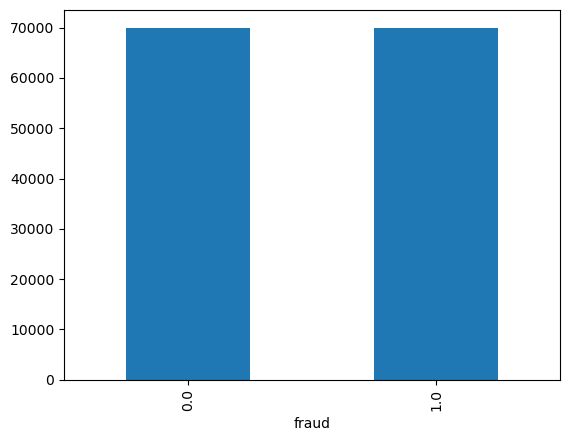

In [98]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [100]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [102]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [104]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94    182615
         1.0       0.45      0.91      0.60     17385

    accuracy                           0.90    200000
   macro avg       0.72      0.90      0.77    200000
weighted avg       0.94      0.90      0.91    200000



#### SMOTE

In [107]:
from imblearn.over_sampling import SMOTE

In [109]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [111]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [113]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [114]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    182615
         1.0       0.54      0.93      0.68     17385

    accuracy                           0.92    200000
   macro avg       0.77      0.93      0.82    200000
weighted avg       0.95      0.92      0.93    200000

